# TD de machine Learning : Catégorisation musicale

**Elective** : Machine Learning   
**Professeur** : Théophile Ravillion   
**Date** : Vendredi 23 Avril 2021

## Contexte 
Vous travaillez chez Deezer, département Data Science, félicitations.
D'habiles ingénieurs musicologues ont mis au point un jeu de données contenant des informations sur des morceaux de musique. 
Avec quelques transformées de Fourier et autres joyeusetés propres à leur art, ils ont mis au point deux jeux de données contenant de nombreux indicateurs décrivant un morceau de musique.
Ils comptent sur vous pour mettre au point un algorithme capable d'identifier le genre musical d'un morceau sur la base des différents indicateurs qu'ils ont mis au point.
Vous vous apprétiez à leur demander des informations concernant ces variables mais vous constatez qu'ils sont partis en séminaire d'entreprise et que vous vous retrouvez tout seul avec un jeu d'entrainement étiqueté, un jeu de test et un post-it goguenard de votre chef qui vous demande de faire des prédictions précises sur le jeu de test d'ici 16h.

## Votre défi :
Modéliser le problème, construire un modèle et faire une prédiction de la catégorie à laquelle appartient chaque élément du fichier test.csv à l'aide d'un modèle aussi simple et performant que possible.


## Livrable
Un projet github contenant un notebook + un fichier prédictions.csv contenant les prédictions faites sur le jeu de test

En header le nom des colonnes (music_id et prediction) et pour chacun des morceaux la catégorie prédite.
Merci d'utiliser la virgule comme séparateur 

Bonne chance !

# Feuille de route

Comment procéder ? 
Pour réaliser cet exercice, il vous faudra :

## Récuperer les données 

In [16]:
import pandas as pd

url_train = "https://raw.githubusercontent.com/RTheophile/td_ml_ynov/main/data/train.csv"
url_test = "https://raw.githubusercontent.com/RTheophile/td_ml_ynov/main/data/test.csv"

df_train = pd.read_csv(url_train, sep=',', decimal='.' )
df_test = pd.read_csv(url_test, sep=',', decimal='.' )

# Cibler les données utiles
data = df_train.copy().drop('category', axis=1)
target = df_train.category

df_train.head()

music_id  chroma_0_mean  chroma_0_std  chroma_10_mean  chroma_10_std  \
0         0     866.507629   1585.437134      415.300842     710.790771   
1         1     832.956909   2140.568115      287.584564     281.795380   
2         2     331.544586    553.657532      260.467499     327.618225   
3         3     454.521851   1170.188110      601.021790    1035.021240   
4         4     180.331635    245.818512      388.924744     917.082581   

   chroma_11_mean  chroma_11_std  chroma_1_mean  chroma_1_std  chroma_2_mean  \
0      683.865845    1011.552856     473.484100    744.247925     304.914825   
1      405.467224     754.076904    1061.359863   2263.894531    2502.509033   
2      283.580139     312.385986     204.369690    225.922531     286.470215   
3      721.523865    1861.131836     350.991791    495.942383     432.551971   
4      186.856262     192.765305     212.240402    370.108063     170.875610   

   ...  mfcc_9_std  onset_rate  spectral_centroid_mean  \
0  ...    0.647313    3.631719               27.621587   
1  ...    0.575588    6.230564               38.780628   
2  ...    0.837297    4.264771               86.371120   
3  ...    0.702976    4.064860               16.844325   
4  ...    0.487534    4.164816                5.764473   

   spectral_decrease_mean  spectral_flux_mean  spectral_rolloff_mean  \
0               -0.186330            1.962404            1525.877193   
1               -0.013198            2.139456            1740.789474   
2               -0.155013            1.336048            5243.859649   
3               -0.287745            2.207420             988.596491   
4               -0.626706            1.263404              21.491228   

   spectral_spread_mean    zcr_mean     zcr_std  category  
0           1579.021838  190.907164  149.482276         1  
1           1941.791036  257.913214  171.257592         3  
2          15422.032531  508.122337  296.141124         3  
3            999.051613  144.638374  142.303996         1  
4            735.051431  181.818928  106.604597         1  

[5 rows x 63 columns]

## Analyser les données  
Identifier la distribution de chaque variable  
Données manquantes    
Données aberrantes   
Données corrélées entre elles  

### Boite à outils :   
**Décrire le contenu d'un dataframe pandas**   
`df.info()`   
`df.describe()`   

Gallerie Seaborn : https://seaborn.pydata.org/examples/index.html#   
Histograme : https://seaborn.pydata.org/generated/seaborn.histplot.html   
PairPlot : https://seaborn.pydata.org/generated/seaborn.pairplot.html   
Corrélogramme : https://seaborn.pydata.org/generated/seaborn.heatmap.html   

**Imputation des valeurs manquantes :**   
KNNImputer : https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html  
`df['chroma_0_mean'] = df['chroma_0_mean'].fillna(df['chroma_0_mean'].mean())`  
`df['chroma_0_mean'] = df['chroma_0_mean'].fillna(df['chroma_0_mean'].median())`  
`df['chroma_0_mean'] = df['chroma_0_mean'].fillna(df['chroma_0_mean'].mode())`  

**Quelques fonctions pandas utiles :**  
**Supprimer la ligne** i du dataframe df :   
`df.drop(i, axis=0, inplace=True)`
  
**Supprimer la colonne** c du dataframe df :   
`df.drop(i, axis=1, inplace=True)`
  
**Appliquer la fonction f** sur la colonne c du dataframe df :   
`df[c] = df[c].apply(lambda x : f(x))`

**Selectionner**  les 5 premiers éléments d'un dataframe df :   
`df.head(5)`

**Selectionner**  les 5 derniers éléments d'un dataframe df :   
`df.tail(5)`

**Selectionner**  les éléments d'un dataframe qui satisfont une condition :   
ex : selectionner toutes les lignes dont le prix est supérieur à 100 :  
`df[df['prix'] > 100]`

In [17]:
# On remplit les données manquantes
for column in data.columns:
    data[column] = data[column].fillna(data[column].mean())

for column in df_test.columns:
    df_test[column] = df_test[column].fillna(df_test[column].mean())

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 62 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   music_id                320 non-null    int64  
 1   chroma_0_mean           320 non-null    float64
 2   chroma_0_std            320 non-null    float64
 3   chroma_10_mean          320 non-null    float64
 4   chroma_10_std           320 non-null    float64
 5   chroma_11_mean          320 non-null    float64
 6   chroma_11_std           320 non-null    float64
 7   chroma_1_mean           320 non-null    float64
 8   chroma_1_std            320 non-null    float64
 9   chroma_2_mean           320 non-null    float64
 10  chroma_2_std            320 non-null    float64
 11  chroma_3_mean           320 non-null    float64
 12  chroma_3_std            320 non-null    float64
 13  chroma_4_mean           320 non-null    float64
 14  chroma_4_std            320 non-null    fl

<AxesSubplot:>

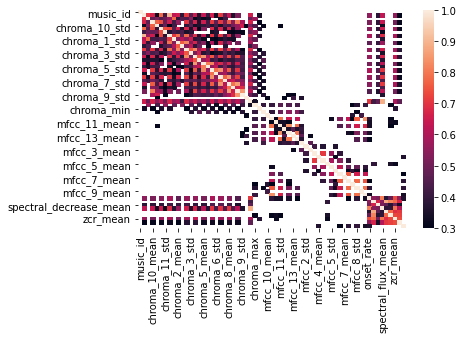

In [18]:
import seaborn as sns

# Matrice de corrélation
corr = df_train.corr().abs().round(2)

# On affiche que les corrélations supérieures à 0.3
corr = corr[corr>=.3]
sns.heatmap(corr)

# Les features 'mfcc_4_mean', 'mfcc_6_std', 'mfcc_7_std', 'mfcc_8_mean', 'mfcc_9_std' et 'onset_rate' sont celles qui ont la meilleure corrélation avec la target 'category'

mfcc_4_mean  mfcc_6_std  mfcc_7_std  mfcc_8_std  mfcc_9_std  onset_rate
0     0.447061    0.726277    0.585949    0.638230    0.647313    3.631719
1     0.317067    0.851986    0.653063    0.627313    0.575588    6.230564
2     0.636152    0.780951    0.632040    0.673518    0.837297    4.264771
3    -0.889902    0.733236    0.560574    0.685316    0.702976    4.064860
4    -0.233449    0.724543    0.602924    0.574132    0.487534    4.164816

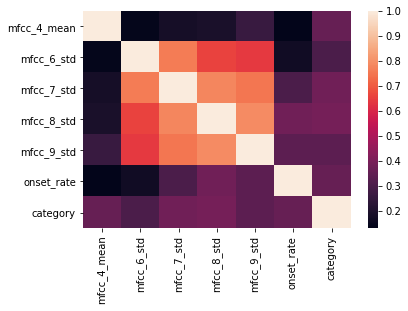

In [19]:
# Notre data contiendra que les données qui nous intéressent
data = data[['mfcc_4_mean', 'mfcc_6_std', 'mfcc_7_std', 'mfcc_8_std', 'mfcc_9_std', 'onset_rate']]

df_test = df_test[['mfcc_4_mean', 'mfcc_6_std', 'mfcc_7_std', 'mfcc_8_std', 'mfcc_9_std', 'onset_rate']]

# On affiche la nouvelle matrice de corrélation plus lisible
corr = df_train[['mfcc_4_mean', 'mfcc_6_std', 'mfcc_7_std', 'mfcc_8_std', 'mfcc_9_std', 'onset_rate', 'category']].corr().abs().round(2)
sns.heatmap(corr)

data.head()

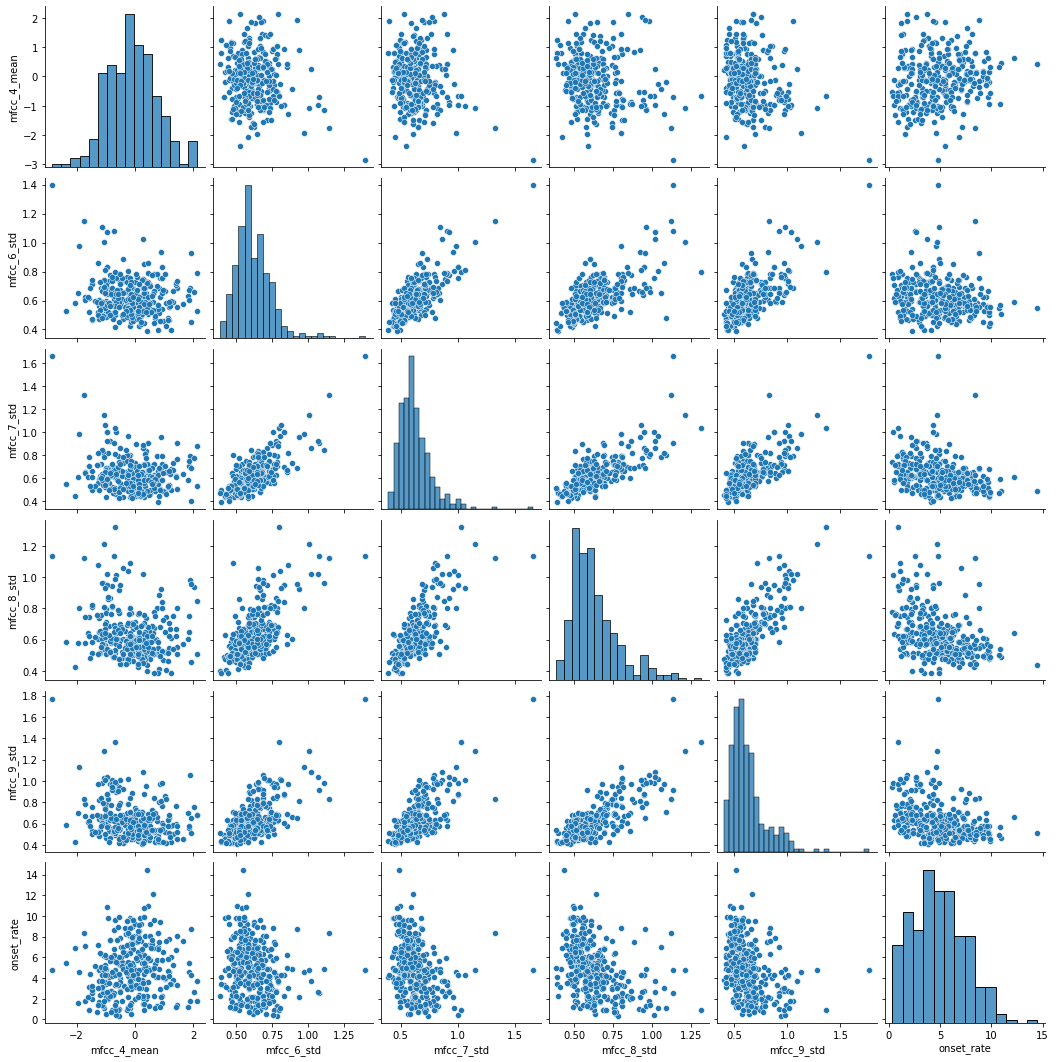

In [20]:
# On regarde les valeurs aberrantes avec un pairplot
sns.pairplot(data)

In [21]:
# On veut enlever les données aberrantes
from sklearn.ensemble import IsolationForest

print(data.shape)
model = IsolationForest(random_state=0).fit(data)
predict_model = model.predict(data)
for i in range(len(predict_model)):
    if predict_model[i] == -1:
        # On enlève la ligne de chaque dataframe utile
        data = data.drop(i, axis=0)
        target = target.drop(i, axis=0)

data.shape
# 30 lignes contenant des valeurs aberrantes ont été enlevées

(320, 6)


(287, 6)

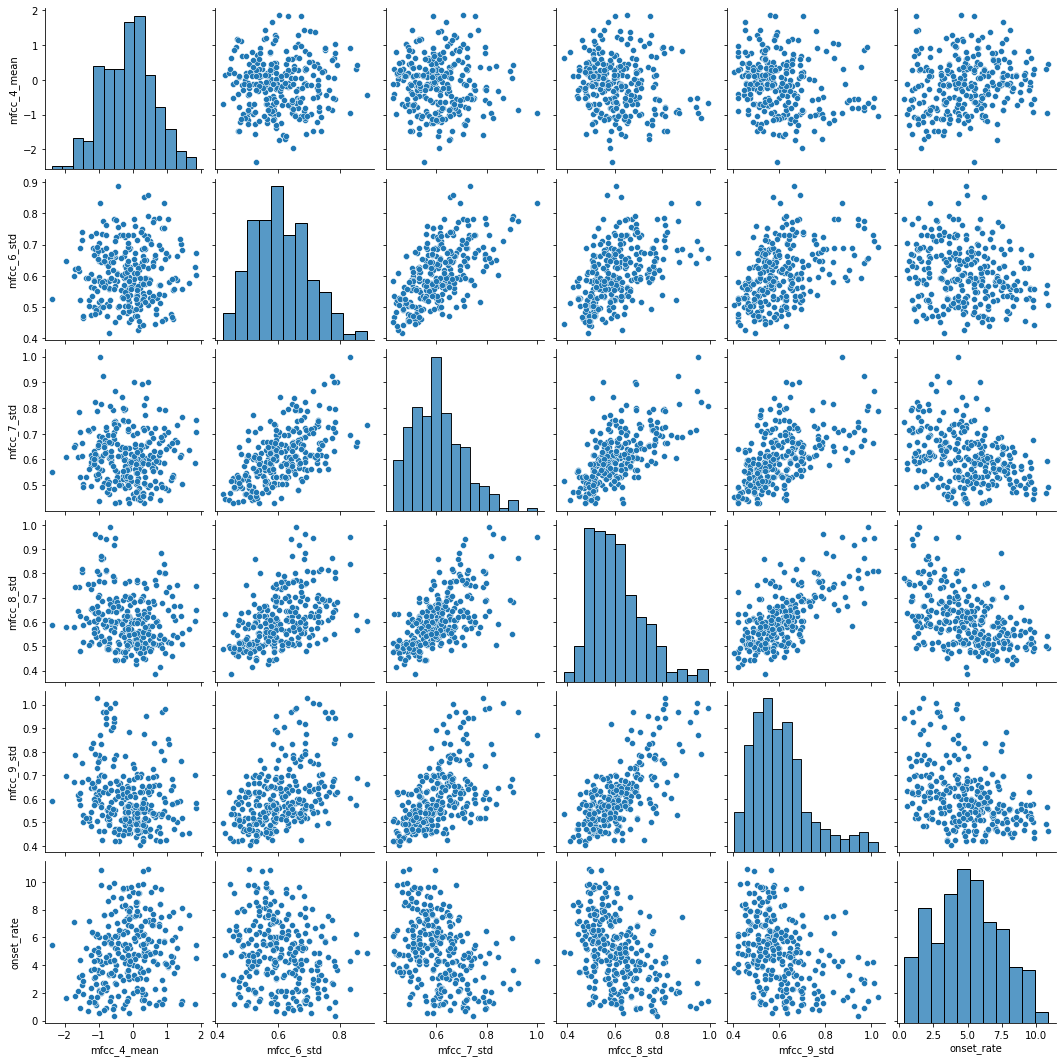

In [22]:
# On regarde le pairplot pour voir s'il y a toujours des valeurs aberrantes
sns.pairplot(data)

## Normaliser les données
Choisir une méthode de normalisation, comparer les résultats obtenus avec différentes méthodes 

### Boite à outils

Robust Scaler : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html   
StandardScaler : 
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler         
MinMaxScaler : 
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler      

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, stratify=target, random_state=3)

from sklearn.metrics import accuracy_score
import numpy as np

# Robust Scaler
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler().fit(X_train)
X_train_rs = robust_scaler.transform(X_train)

robust_scaler = RobustScaler().fit(X_test)
X_test_rs = robust_scaler.transform(X_test)

# Standard Scaler
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler().fit(X_train)
X_train_ss = standard_scaler.transform(X_train)

standard_scaler = StandardScaler().fit(X_test)
X_test_ss = standard_scaler.transform(X_test)

# Min Max Scaler
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler().fit(X_train)
X_train_mm = min_max_scaler.transform(X_train)

min_max_scaler = MinMaxScaler().fit(X_test)
X_test_mm = min_max_scaler.transform(X_test)


## Etudier l’opportunité d’une réduction de dimension
- Tester les perfs obtenus pour différentes valeurs
- Visualiser la variance expliquée par chaque axe
- Justifier le nombre d’axes retenus

### Boite à outils  
Analyse en composante principale : https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html   

Robust Scaler (train) : 1.0000000000000002
Robust Scaler (test) : 1.0000000000000002
Standard Scaler (train) : 1.0
Standard Scaler (test) : 1.0
MinMax Scaler (train) : 1.0
MinMax Scaler (test) : 1.0


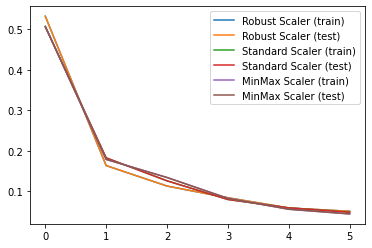

In [24]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=6)

pca.fit(X_train_rs)
X_train_reduc_rs = pca.transform(X_train_rs)
plt.plot(pca.explained_variance_ratio_, label="Robust Scaler (train)")
print(f'Robust Scaler (train) : {pca.explained_variance_ratio_.sum()}')

X_test_reduc_rs = pca.transform(X_test_rs)
plt.plot(pca.explained_variance_ratio_, label="Robust Scaler (test)")
print(f'Robust Scaler (test) : {pca.explained_variance_ratio_.sum()}')

pca.fit(X_train_ss)
X_train_reduc_ss = pca.transform(X_train_ss)
plt.plot(pca.explained_variance_ratio_, label="Standard Scaler (train)")
print(f'Standard Scaler (train) : {pca.explained_variance_ratio_.sum()}')

X_test_reduc_ss = pca.transform(X_test_ss)
plt.plot(pca.explained_variance_ratio_, label="Standard Scaler (test)")
print(f'Standard Scaler (test) : {pca.explained_variance_ratio_.sum()}')

pca.fit(X_train_mm)
X_train_reduc_mm = pca.transform(X_train_mm)
plt.plot(pca.explained_variance_ratio_, label="MinMax Scaler (train)")
print(f'MinMax Scaler (train) : {pca.explained_variance_ratio_.sum()}')

X_test_reduc_mm = pca.transform(X_test_mm)
plt.plot(pca.explained_variance_ratio_, label="MinMax Scaler (test)")
print(f'MinMax Scaler (test) : {pca.explained_variance_ratio_.sum()}')

plt.legend(loc='upper right')
plt.show()

## Créer un échantillon non biaisé de validation
A moins que vous n'utilisiez la k-fold validation (stratifiée ?)

### Boite à outil :   
`from sklearn.model_selection import train_test_split`  

## Entrainer différents algorithmes de classification

`model = ...`   
`model.fit(X_train, y_train)`

### Boite à outils  
SVM : https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html   
Random Forest : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier   
Regression logistique : https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html   

SCV
[SVC] Score : 0.603448275862069

Random Forest Classifier


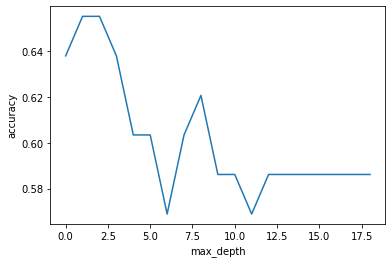

[Random Forest Classifier] Best accuracy = 0.6551724137931034
[Random Forest Classifier] Obtained at max_depth = 1

Logistic Regression
[Logistic Regression] Score : 0.6379310344827587


KNeighbors Classifier


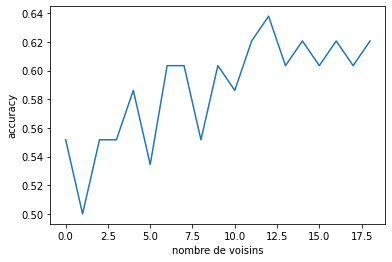

[KNN] Best accuracy = 0.6379310344827587
[KNN] Obtained at n_value = 12


In [25]:
# On change ici les set de données pour tester différentes possibilités 
X_train = X_train_reduc_ss
y_train = y_train
X_test = X_test_reduc_ss
y_test = y_test

# SVC
print(f'SCV')
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

svc = make_pipeline(RobustScaler(), SVC(kernel='linear', C=1000, gamma='auto'))
svc.fit(X_train, y_train)

y_predict = svc.predict(X_test)
score = accuracy_score(y_predict, y_test)
print(f'[SVC] Score : {score}')

# Random Forest Classifier
print(f'\nRandom Forest Classifier')
from sklearn.ensemble import RandomForestClassifier

result = []
for depth in range(1, 20):
    rfc = RandomForestClassifier(max_depth=depth, random_state=0)
    rfc.fit(X_train, y_train)

    y_predict = rfc.predict(X_test)
    score = accuracy_score(y_predict, y_test)
    result.append(score)

plt.plot(result)
plt.ylabel('accuracy')
plt.xlabel('max_depth')
plt.show()
print('[Random Forest Classifier] Best accuracy = ' + str(np.max(result)))
print('[Random Forest Classifier] Obtained at max_depth = ' + str(np.argmax(result)))
best_depth = np.argmax(result)

#class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
# Logistic Regression
print(f'\nLogistic Regression')
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000, random_state=0)
lr.fit(X_train, y_train)

y_predict = lr.predict(X_test)
score = accuracy_score(y_predict, y_test)
print(f'[Logistic Regression] Score : {score}\n')

# KNeighbors Classifier
print(f'\nKNeighbors Classifier')
from sklearn.neighbors import KNeighborsClassifier
result = []
for n in range(1, 20): 
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)

    score = accuracy_score(y_predict, y_test)
    result.append(score)

plt.plot(result)
plt.ylabel('accuracy')
plt.xlabel('nombre de voisins')
plt.show()

print('[KNN] Best accuracy = ' + str(np.max(result)))
print('[KNN] Obtained at n_value = ' + str(np.argmax(result)))

## Comparer la performance de différents algorithmes
Faire des prédictions et evaluer leur justesse de ces prédictions à l'aide de différents indicateurs :
- Matrice de confusion
- Accuracy
- F-Score

### Boite à outils  
Un rapport de performance clé en main : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html   

Liste des différents indicateurs : https://scikit-learn.org/stable/modules/model_evaluation.html

Faire une prédiction avec un model sklearn entrainé :
`y_pred_1 = model_1.predict(X_val, y_val)`   





In [26]:
from sklearn.metrics import classification_report

y_predict_svc = svc.predict(X_test)
print(f'SVC')
print(classification_report(y_predict_svc, y_test))

y_predict_rfc = rfc.predict(X_test)
print(f'\nRandom Forest Classifier')
print(classification_report(y_predict_rfc, y_test))

y_predict_lr = lr.predict(X_test)
print(f'\nLogistic Regression')
print(classification_report(y_predict_lr, y_test))

SVC
              precision    recall  f1-score   support

           0       0.77      0.62      0.69        16
           1       0.75      0.75      0.75        16
           2       0.75      0.60      0.67        20
           3       0.08      0.17      0.11         6

    accuracy                           0.60        58
   macro avg       0.59      0.54      0.55        58
weighted avg       0.69      0.60      0.64        58


Random Forest Classifier
              precision    recall  f1-score   support

           0       0.62      0.57      0.59        14
           1       0.81      0.59      0.68        22
           2       0.62      0.62      0.62        16
           3       0.23      0.50      0.32         6

    accuracy                           0.59        58
   macro avg       0.57      0.57      0.55        58
weighted avg       0.65      0.59      0.61        58


Logistic Regression
              precision    recall  f1-score   support

           0       0.77 

Text(0.5, 1.0, 'Logistic Regression')

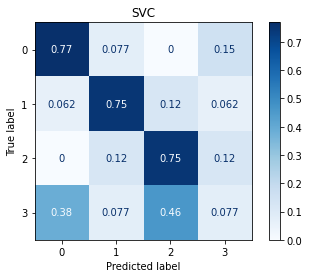

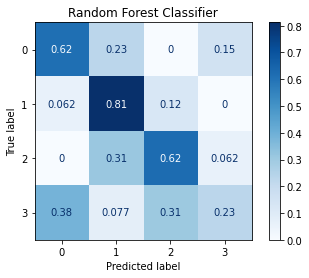

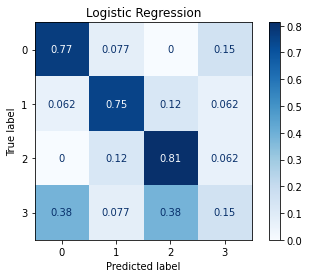

In [27]:
from sklearn.metrics import plot_confusion_matrix

disp = plot_confusion_matrix(svc, X_test, y_test, cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title('SVC')

disp = plot_confusion_matrix(rfc, X_test, y_test, cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title('Random Forest Classifier')

disp = plot_confusion_matrix(lr, X_test, y_test, cmap=plt.cm.Blues, normalize='true')
disp.ax_.set_title('Logistic Regression')

## Optimiser les hyper-paramètres de l’algorithme retenu
Tester différents hyper-paramètres pour tirer au mieux partit de l'algorithme retenu

### Boite à outils  
GridSearchCV :  https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html



In [28]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('linear', 'rbf'), 'C':[0.01, 10000]}
svc = SVC()
grid_search = GridSearchCV(estimator=svc, param_grid=parameters)
grid_search.fit(X_train, y_train)

print(f'[SVC] Best estimator : {grid_search.best_estimator_}')
print(f'[SVC] Score : {grid_search.best_score_}')

parameters = {'max_depth':[x for x in range(1, 10)]}
rfc = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rfc, param_grid=parameters)
grid_search.fit(X_train, y_train)

print(f'\n[RFC] Best estimator : {grid_search.best_estimator_}')
print(f'[RFC] Score : {grid_search.best_score_}')

parameters = {'C':[1.0, 1000]}
lr = LogisticRegression(random_state=0)
grid_search = GridSearchCV(estimator=lr, param_grid=parameters)
grid_search.fit(X_train, y_train)

print(f'\n[LR] Best estimator : {grid_search.best_estimator_}')
print(f'[LR] Score : {grid_search.best_score_}')


[SVC] Best estimator : SVC(C=10000, kernel='linear')
[SVC] Score : 0.6066666666666667

[RFC] Best estimator : RandomForestClassifier(max_depth=5)
[RFC] Score : 0.6109178743961353

[LR] Best estimator : LogisticRegression(random_state=0)
[LR] Score : 0.6152657004830917


## Prédire des valeurs pour le jeu de test 
Créer un fichier au format .csv contenant  vos prédictions.
En header le nom des colonnes (music_id et prediction) et pour chacun des morceaux la catégorie prédite.

Vérifier que votre notebook fonctionne avant de le rendre 

### Boite à outils  
exporter un dataFrame pandas au format csv :
`df_test.to_csv('data/test.csv' , sep=',', decimal='.')`

In [29]:

svc = make_pipeline(RobustScaler(), SVC(C=1000, gamma='auto'))
svc.fit(X_train, y_train)
y_predict_svc = svc.predict(df_test)

rfc = RandomForestClassifier(max_depth=best_depth, random_state=0)
rfc.fit(X_train, y_train)
y_predict_rfc = rfc.predict(df_test)

lr = LogisticRegression(C=1000, random_state=0)
lr.fit(X_train, y_train)
y_predict_lr = lr.predict(df_test)

print(f'Sur le set de test')
print(f'SVC\n{y_predict_svc}')
print(f'\nRFC\n{y_predict_rfc}')
print(f'\nLR\n{y_predict_lr}')


Sur le set de test
SVC
[3 3 3 1 3 3 3 3 1 3 0 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 1 1 3 3 3 3 3 3 3 3 3
 1 3 3 3 3 3 3 1 3 3 0 3 1 0 3 3 3 3 1 3 3 1 3 3 3 1 3 3 1 3 1 3 3 1 3 1 3
 3 1 1 3 3 3]

RFC
[1 1 2 2 1 1 2 1 1 1 2 1 1 2 0 1 2 2 1 0 1 0 1 0 1 1 1 2 1 0 1 1 2 2 1 2 2
 0 1 1 1 1 2 1 1 0 1 2 0 2 1 2 1 1 2 1 1 1 2 2 1 0 2 1 1 1 1 1 1 1 0 2 1 1
 1 1 0 1 2 0]

LR
[1 1 2 2 1 1 2 1 0 1 2 1 1 2 1 1 2 1 1 1 1 1 1 2 1 1 1 2 1 1 1 1 2 2 0 2 2
 2 1 1 1 1 1 1 1 1 1 3 2 2 0 2 1 1 1 1 1 1 2 1 1 1 2 1 1 0 1 0 1 1 2 1 1 1
 1 1 2 1 2 1]


In [30]:
# On choisit la Logistic Regression
y_predict = y_predict_lr
idx = range(0, df_test.shape[0])
df = pd.DataFrame({'music_id':idx,'prediction':y_predict})
df.to_csv('data/test.csv', sep=',', decimal='.')
df

music_id  prediction
0          0           1
1          1           1
2          2           2
3          3           2
4          4           1
..       ...         ...
75        75           1
76        76           2
77        77           1
78        78           2
79        79           1

[80 rows x 2 columns]